<a href="https://colab.research.google.com/github/LeonardoClemente23/ENEM-2018/blob/main/Matplotlib_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Trabalho da quarentena**
Um pouco do pacote matplotlib e análise de dados do ENEM 2018 com ajuda do canal Programação dinâmica. Essa amostra dos dados do ENEM não representa fielmente o banco de dados principal, onde tem as informações de todos os inscritos. Neste data frame têm menos de 2,5% do total. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

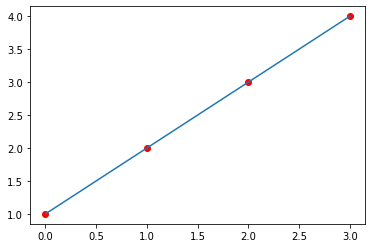

In [ ]:
plt.plot([1,2,3,4],"ro") # pontos vermelhos
plt.plot([1,2,3,4]) # linha contínua
plt.show()

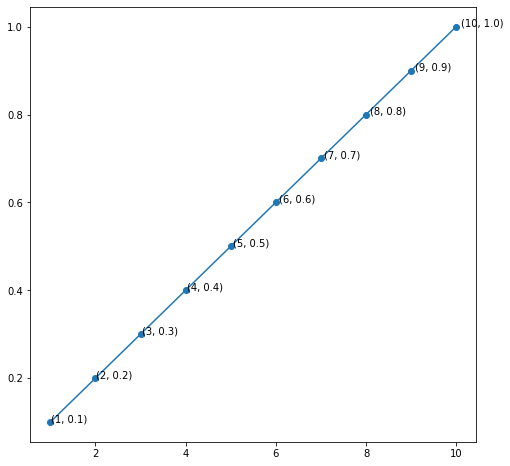

In [ ]:
fig1, ax = plt.subplots(figsize=(8,8))
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.]
plt.plot(x, y, marker='o')
for xn, yn in zip(x,y):
  ax.annotate(f'({xn}, {yn})', xy=(xn*1.01, yn))

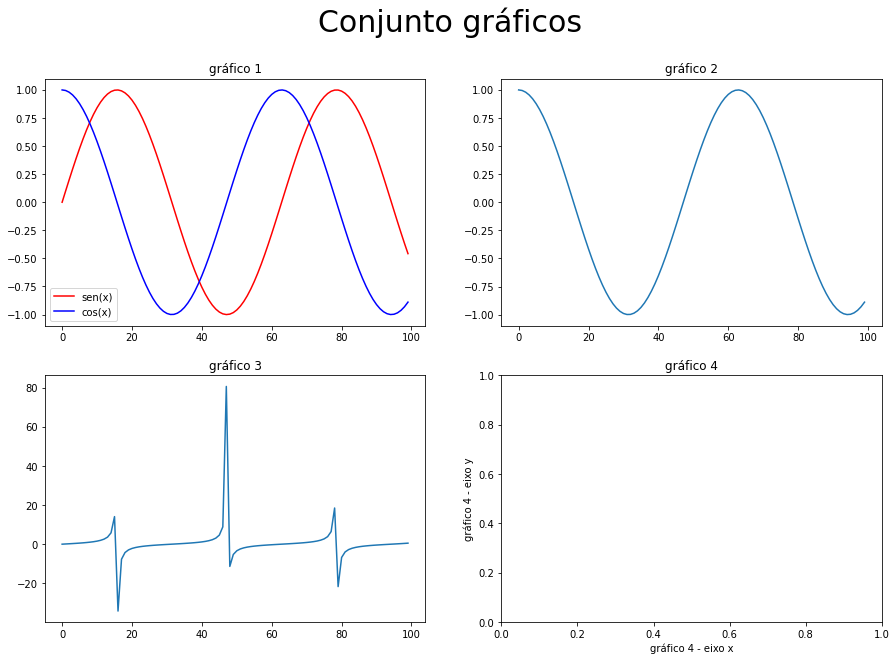

In [ ]:
# fig == a figura toda; f1_axes == matriz com os subplots
x = np.arange(0, 10, 0.1)
fig, f1_axes = plt.subplots(nrows=2,ncols=2, figsize=(15,10))
fig.suptitle('Conjunto gráficos',size=30)

f1_axes[0, 0].plot(np.sin(x), label="sen(x)", color="red")
f1_axes[0, 0].plot(np.cos(x), label="cos(x)",color="blue")
f1_axes[0, 0].set_title("gráfico 1")
f1_axes[0, 0].legend()

f1_axes[0, 1].plot(np.cos(x))
f1_axes[0, 1].set_title("gráfico 2")

f1_axes[1, 0].plot(np.tan(x))
f1_axes[1, 0].set_title("gráfico 3")

f1_axes[1, 1].set_title("gráfico 4")
f1_axes[1, 1].set_xlabel("gráfico 4 - eixo x")
f1_axes[1, 1].set_ylabel("gráfico 4 - eixo y")

plt.show()


In [ ]:
amostra_enem = pd.read_csv("drive/My Drive/Colab Notebooks/Datasets/ENEM/fracao_matplotlib_MICRODADOS_ENEM_2018.csv") # abrindo o arquivo
amostra_enem

,NU_INSCRICAO,SG_UF_RESIDENCIA,TP_SEXO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
0,180008202043,DF,M,NaN,NaN,A,A
1,180007197856,MA,F,480.3,280.0,B,B
2,180008517434,SP,F,NaN,NaN,E,E
3,180007661228,BA,F,NaN,NaN,B,C
4,180008787987,BA,M,NaN,360.0,C,E
...,...,...,...,...,...,...,...
5513742,180013945649,RJ,F,NaN,NaN,C,C
5513743,180013964149,AM,F,528.1,320.0,H,H
5513744,180013980226,SP,F,NaN,NaN,F,B
5513745,180013934137,SP,F,474.1,340.0,C,E


TP_SEXO
F    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
M    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

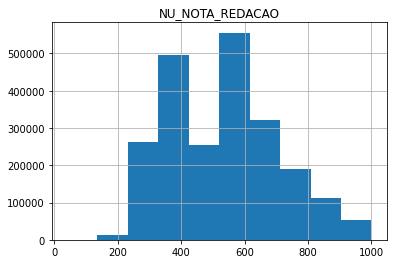

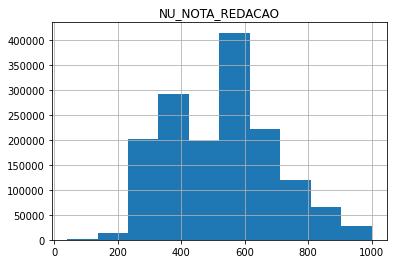

In [ ]:
colunas_selecionadas = ['TP_SEXO','NU_NOTA_REDACAO']
amostra_enem_dropado = amostra_enem.dropna()
amostra_enem_dropado[colunas_selecionadas].query("NU_NOTA_REDACAO > 0").groupby('TP_SEXO').hist()

In [ ]:
colunas_selecionadas = ['NU_INSCRICAO','NU_NOTA_MT','NU_NOTA_REDACAO','Q001','Q002']
amostra_enem_selecionado = amostra_enem_dropado[colunas_selecionadas]
amostra_enem_selecionado

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
1,180007197856,480.3,280.0,B,B
5,180007239581,538.8,580.0,C,D
7,180008090447,733.8,680.0,A,E
8,180008257068,459.0,340.0,D,D
9,180008202044,525.4,740.0,C,C
...,...,...,...,...,...
5513735,180013970136,538.8,340.0,F,F
5513736,180013955758,414.9,320.0,E,E
5513743,180013964149,528.1,320.0,H,H
5513745,180013934137,474.1,340.0,C,E


In [ ]:
q001_002_respostas = {'A':'Nunca estudou',
                      'B':'Não completou a 4ª série/5º ano do Ensino Fundamental',
                      'C':'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
                      'D':'Completou a 8ª série/9º ano, mas não completou o Ensino Médio',
                      'E':'Completo o Ensino Médio, mas não completou a Faculdade',
                      'F':'Completou a Faculdade, mas não completou a Pós-graduação',
                      'G':'Completou a Pós-graduação',
                      'H':'Não sei'}

In [ ]:
amostra_enem_selecionado_resp = amostra_enem_selecionado.copy() # para retirar os avisos de problema de cópia
amostra_enem_selecionado_resp['RESP_Q001'] = [q001_002_respostas[resp] for resp in amostra_enem_selecionado.Q001]
amostra_enem_selecionado_resp['RESP_Q002'] = [q001_002_respostas[resp] for resp in amostra_enem_selecionado.Q002]
amostra_enem_selecionado_resp.head(4)

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,RESP_Q001,RESP_Q002
1,180007197856,480.3,280.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...
5,180007239581,538.8,580.0,C,D,"Completou a 4ª série/5º ano, mas não completou...","Completou a 8ª série/9º ano, mas não completou..."
7,180008090447,733.8,680.0,A,E,Nunca estudou,"Completo o Ensino Médio, mas não completou a F..."
8,180008257068,459.0,340.0,D,D,"Completou a 8ª série/9º ano, mas não completou...","Completou a 8ª série/9º ano, mas não completou..."


## **Análise do número de inscrições de acordo com o grau de escolaridade dos pais**




1.   Perfil do Pai
2.   Perfil da Mãe








In [ ]:
amostra_enem_selecionado_resp[['NU_INSCRICAO','RESP_Q001']].groupby('RESP_Q001').count()\
.sort_values('NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
RESP_Q001,
"Completo o Ensino Médio, mas não completou a Faculdade",1043472
Não completou a 4ª série/5º ano do Ensino Fundamental,813670
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",549969
"Completou a 8ª série/9º ano, mas não completou o Ensino Médio",460454
Não sei,325653
"Completou a Faculdade, mas não completou a Pós-graduação",311918
Nunca estudou,200902
Completou a Pós-graduação,187705


In [ ]:
amostra_enem_selecionado_resp[['NU_INSCRICAO','RESP_Q002']].groupby('RESP_Q002').count()\
.sort_values('NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
RESP_Q002,
"Completo o Ensino Médio, mas não completou a Faculdade",1275076
Não completou a 4ª série/5º ano do Ensino Fundamental,606702
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",515982
"Completou a 8ª série/9º ano, mas não completou o Ensino Médio",509545
"Completou a Faculdade, mas não completou a Pós-graduação",417225
Completou a Pós-graduação,322696
Nunca estudou,136414
Não sei,110103


## **Análise da média da nota de matemática de acordo com o grau de escolaridade dos pais**


1.   Perfil do Pai
2.   Perfil da Mãe



In [ ]:
amostra_enem_selecionado_resp[['NU_NOTA_MT','RESP_Q001']].groupby('RESP_Q001').mean()\
.sort_values('NU_NOTA_MT', ascending=False)

,NU_NOTA_MT
RESP_Q001,
Completou a Pós-graduação,628.857128
"Completou a Faculdade, mas não completou a Pós-graduação",606.911985
"Completo o Ensino Médio, mas não completou a Faculdade",550.922641
"Completou a 8ª série/9º ano, mas não completou o Ensino Médio",530.540300
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",519.450349
Não sei,512.678252
Não completou a 4ª série/5º ano do Ensino Fundamental,502.412921
Nunca estudou,483.412209


In [ ]:
amostra_enem_selecionado_resp[['NU_NOTA_MT','RESP_Q002']].groupby('RESP_Q002').mean()\
.sort_values('NU_NOTA_MT', ascending=False)

,NU_NOTA_MT
RESP_Q002,
Completou a Pós-graduação,604.646114
"Completou a Faculdade, mas não completou a Pós-graduação",591.438424
"Completo o Ensino Médio, mas não completou a Faculdade",541.991564
"Completou a 8ª série/9º ano, mas não completou o Ensino Médio",521.292757
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",512.046346
Não sei,504.112213
Não completou a 4ª série/5º ano do Ensino Fundamental,497.003174
Nunca estudou,478.218055


In [ ]:
amostra_enem_selecionado_resp['SG_UF_RESIDENCIA'] = amostra_enem_dropado['SG_UF_RESIDENCIA']
amostra_enem_selecionado_resp

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,RESP_Q001,RESP_Q002,SG_UF_RESIDENCIA
1,180007197856,480.3,280.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...,MA
5,180007239581,538.8,580.0,C,D,"Completou a 4ª série/5º ano, mas não completou...","Completou a 8ª série/9º ano, mas não completou...",PB
7,180008090447,733.8,680.0,A,E,Nunca estudou,"Completo o Ensino Médio, mas não completou a F...",PI
8,180008257068,459.0,340.0,D,D,"Completou a 8ª série/9º ano, mas não completou...","Completou a 8ª série/9º ano, mas não completou...",CE
9,180008202044,525.4,740.0,C,C,"Completou a 4ª série/5º ano, mas não completou...","Completou a 4ª série/5º ano, mas não completou...",MT
...,...,...,...,...,...,...,...,...
5513735,180013970136,538.8,340.0,F,F,"Completou a Faculdade, mas não completou a Pós...","Completou a Faculdade, mas não completou a Pós...",MA
5513736,180013955758,414.9,320.0,E,E,"Completo o Ensino Médio, mas não completou a F...","Completo o Ensino Médio, mas não completou a F...",AM
5513743,180013964149,528.1,320.0,H,H,Não sei,Não sei,AM
5513745,180013934137,474.1,340.0,C,E,"Completou a 4ª série/5º ano, mas não completou...","Completo o Ensino Médio, mas não completou a F...",SP


In [ ]:
# Usando o where (que parece com o query)
amostra_enem_selecionado_resp[['NU_NOTA_REDACAO','RESP_Q002']]\
.where(amostra_enem_selecionado_resp.SG_UF_RESIDENCIA == 'SP').groupby('RESP_Q002')\
.mean().sort_values('NU_NOTA_REDACAO',ascending=False)

,NU_NOTA_REDACAO
RESP_Q002,
Completou a Pós-graduação,631.897240
"Completou a Faculdade, mas não completou a Pós-graduação",611.155591
"Completo o Ensino Médio, mas não completou a Faculdade",537.377448
"Completou a 8ª série/9º ano, mas não completou o Ensino Médio",505.548170
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",492.396846
Não completou a 4ª série/5º ano do Ensino Fundamental,466.911382
Não sei,464.232837
Nunca estudou,415.417750


In [ ]:
amostra_enem_agrupado_resp = amostra_enem_selecionado_resp[['SG_UF_RESIDENCIA','Q002','NU_NOTA_REDACAO']]\
.groupby(['Q002','SG_UF_RESIDENCIA']).mean()
amostra_enem_agrupado_resp

NU_NOTA_REDACAO
Q002 SG_UF_RESIDENCIA                 
A    AC                     407.010846
     AL                     420.360685
     AM                     382.142444
     AP                     412.533869
     BA                     416.821384
...                                ...
H    RS                     468.037215
     SC                     463.930412
     SE                     460.214447
     SP                     464.232837
     TO                     428.539130

[216 rows x 1 columns]

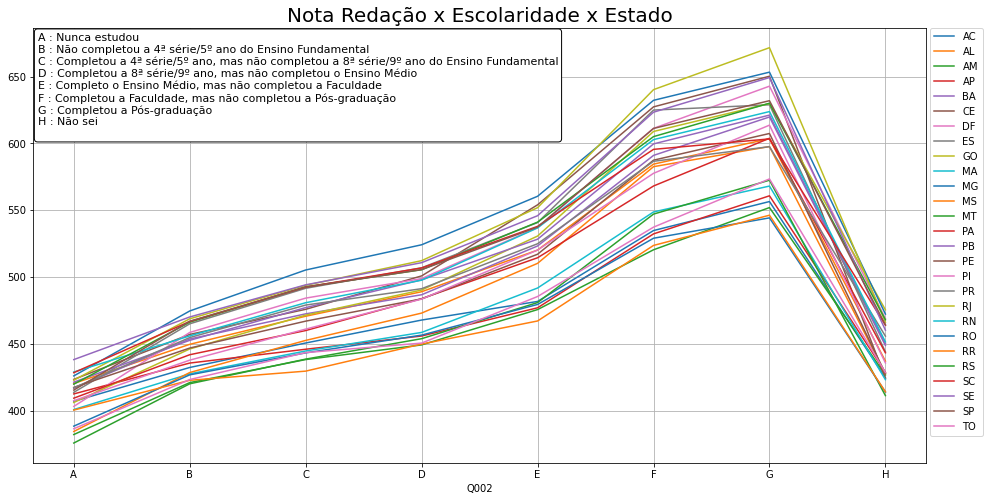

In [ ]:
# O gráfico
axes = amostra_enem_agrupado_resp.unstack().plot(figsize=(16,8), grid=True)
axes.set_title('Nota Redação x Escolaridade x Estado', fontsize=20)

# Colocando o conteúdo da legenda em uma lista de strings
handles, labels = axes.get_legend_handles_labels()

# Extraindo a sigla dos estados, da legenda e mostrando-a no gráfico
import re # TODO pesquisar depois
edited_labels = [re.search(',\s(.+?)\)', label).group(1) for label in labels]
axes.legend(edited_labels, bbox_to_anchor=(1.005, 1), loc=0, borderaxespad=0.)

# montagem da legenda das respostas do questionário
text_dict_Q002 = ''
for key, value in q001_002_respostas.items():
  text_dict_Q002 += f"{key} : {value}\n"

# mostrando a legenda das respostas do questionário
axes.text(0.005, 0.75, text_dict_Q002, transform=axes.transAxes, fontsize=11,
          bbox={'boxstyle':'round','facecolor':'white','alpha':1})

#rotacionando as marcações no eixo x
axes.tick_params(axis='x',labelrotation=45, labelsize=12.)

plt.show()